
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**Download the fashion mnist dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt    
%matplotlib inline

In [3]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [4]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

In [5]:
X_train[5].shape

(28, 28)

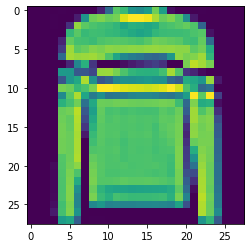

In [6]:
plt.imshow(X_train[5]);

In [7]:
y_train[5]

2

In [8]:
classes[2]

'Pullover'

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [9]:
X_train.max()

255

In [10]:
X_train.min()

0

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train.max()

1.0

In [13]:
X_train.min()

0.0

In [14]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

**Reshape the X into 4 dimension**

In [15]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)

In [16]:
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [17]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
y_train.shape

(60000,)

In [21]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [23]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 17500)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4480256   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 4,483,106
Trainable params: 4,483,106
Non-trainable params: 0
______________________________________________

In [25]:
model.fit(X_train, y = Y_train, validation_data=(X_test,Y_test), batch_size = 32, epochs = 10, verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 200s 106ms/step - loss: 0.4126 - accuracy: 0.8587 - val_loss: 0.3161 - val_accuracy: 0.8888
Epoch 2/10
1875/1875 [==============================] - 198s 105ms/step - loss: 0.3005 - accuracy: 0.8967 - val_loss: 0.3425 - val_accuracy: 0.8879
Epoch 3/10
1875/1875 [==============================] - 199s 106ms/step - loss: 0.2836 - accuracy: 0.9023 - val_loss: 0.2968 - val_accuracy: 0.8961
Epoch 4/10
1875/1875 [==============================] - 200s 107ms/step - loss: 0.2731 - accuracy: 0.9066 - val_loss: 0.2949 - val_accuracy: 0.8975
Epoch 5/10
1875/1875 [==============================] - 202s 108ms/step - loss: 0.2688 - accuracy: 0.9088 - val_loss: 0.3192 - val_accuracy: 0.8968
Epoch 6/10
1875/1875 [==============================] - 202s 108ms/step - loss: 0.2689 - accuracy: 0.9089 - val_loss: 0.3153 - val_accuracy: 0.8990
Epoch 7/10
1875/1875 [==============================] - 199s 106ms/step - loss: 0.2630 - accuracy: 0.9101 - val_

In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
model.history.history

{'loss': [0.41257908940315247,
  0.30048802495002747,
  0.283620148897171,
  0.27307406067848206,
  0.2687666714191437,
  0.26892146468162537,
  0.2630310654640198,
  0.26343828439712524,
  0.26113325357437134,
  0.2614324986934662],
 'accuracy': [0.8586500287055969,
  0.8966500163078308,
  0.9023000001907349,
  0.9066333174705505,
  0.9087833166122437,
  0.9089000225067139,
  0.9100666642189026,
  0.9108333587646484,
  0.9111666679382324,
  0.9134666919708252],
 'val_loss': [0.31614717841148376,
  0.3425455689430237,
  0.2968348264694214,
  0.29488465189933777,
  0.31921446323394775,
  0.3152836561203003,
  0.30712178349494934,
  0.3103793263435364,
  0.3584490120410919,
  0.3256327509880066],
 'val_accuracy': [0.8888000249862671,
  0.8878999948501587,
  0.8960999846458435,
  0.8974999785423279,
  0.8967999815940857,
  0.8989999890327454,
  0.8988999724388123,
  0.8985000252723694,
  0.8935999870300293,
  0.8978000283241272]}

In [28]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.412579,0.858650,0.316147,0.8888
1,0.300488,0.896650,0.342546,0.8879
2,0.283620,0.902300,0.296835,0.8961
3,0.273074,0.906633,0.294885,0.8975
4,0.268767,0.908783,0.319214,0.8968


**Plot values of metrics you used in your model.**

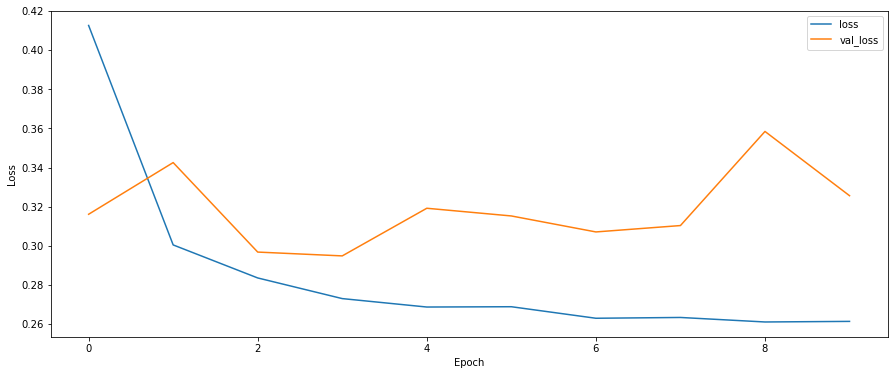

In [29]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

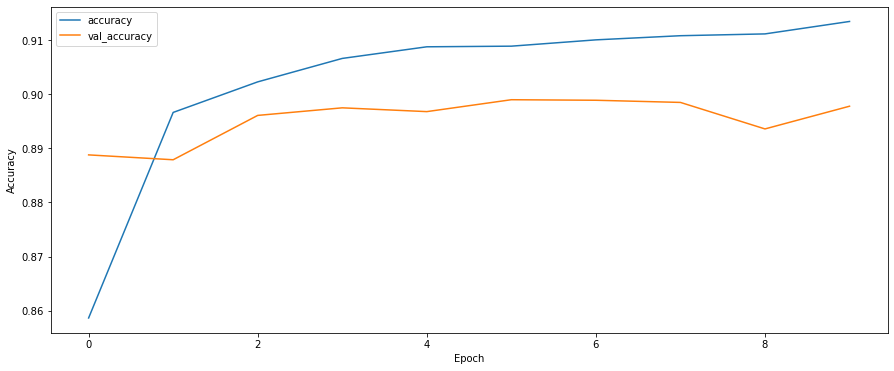

In [30]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

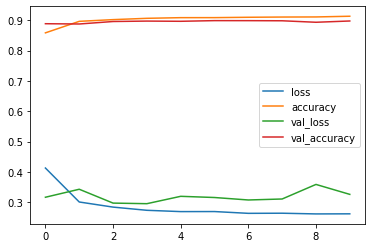

In [31]:
summary.plot();

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [34]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 [==============================] - 4s 14ms/step - loss: 0.3256 - accuracy: 0.8978
[0.3256327509880066, 0.8978000283241272]


In [35]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [36]:
preds = model.predict(X_test)
preds

array([[2.63283275e-12, 1.57813652e-15, 5.89905971e-11, ...,
        6.67821359e-06, 1.80547999e-09, 9.99964952e-01],
       [6.55267895e-10, 1.38436263e-25, 1.00000000e+00, ...,
        3.35412717e-19, 1.21121061e-14, 3.01079485e-21],
       [2.24727170e-08, 1.00000000e+00, 2.63875310e-11, ...,
        6.54819515e-13, 8.78948414e-10, 5.54463126e-14],
       ...,
       [1.78264264e-10, 2.97614170e-26, 5.40269039e-15, ...,
        8.85951604e-14, 9.99999881e-01, 8.09962765e-18],
       [7.84434795e-10, 9.99999166e-01, 6.12021989e-13, ...,
        3.46831960e-12, 4.90406431e-11, 9.15304985e-12],
       [2.08660334e-04, 2.33953069e-05, 1.15047337e-03, ...,
        1.46307647e-01, 1.43530015e-02, 1.18589755e-02]], dtype=float32)

In [37]:
predictions = np.argmax(preds, axis=1)

In [38]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.77      0.82      1000
           3       0.92      0.90      0.91      1000
           4       0.77      0.90      0.83      1000
           5       0.97      0.98      0.97      1000
           6       0.76      0.65      0.70      1000
           7       0.96      0.94      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [40]:
print(confusion_matrix(y_test, predictions))

[[907   0  10  10  11   1  56   0   4   1]
 [  3 973   1  15   4   0   2   0   2   0]
 [ 19   0 774   9 124   0  73   0   1   0]
 [ 25   9   6 902  32   0  25   0   1   0]
 [  1   0  36  19 901   0  42   0   1   0]
 [  0   0   0   1   0 977   0  13   0   9]
 [164   0  60  23  93   0 651   0   9   0]
 [  0   0   0   0   0  21   0 943   1  35]
 [  1   2   1   4   2   4   5   3 978   0]
 [  0   0   0   0   0   5   0  22   1 972]]


In [41]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3256327509880066
Test accuracy: 0.8978000283241272


# Prediction

In [47]:
samples=[X_test[22],X_test[30],X_test[41]]

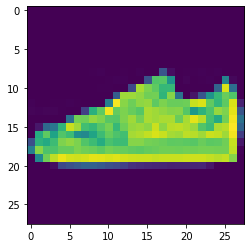

In [48]:
plt.imshow(samples[0])

In [49]:
samples[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [50]:
img=samples[0]
img.shape

(28, 28, 1)

In [51]:
type(img)

numpy.ndarray

In [52]:
resized_img=np.expand_dims(img, axis=0)
resized_img.shape

(1, 28, 28, 1)

In [53]:
model.predict(resized_img)

array([[1.1931226e-09, 1.2597203e-12, 2.4295865e-09, 1.4601973e-09,
        1.2403784e-10, 7.5816171e-04, 1.4087944e-09, 9.9918002e-01,
        5.6664485e-06, 5.6172310e-05]], dtype=float32)

In [54]:
np.argmax(model.predict(resized_img))

7

In [55]:
classes[0]

'T-shirt/top'

In [56]:

for img in samples:
    resized_img=np.expand_dims(img, axis=0)
    print(pd.Series(model.predict(resized_img).flatten(), index = classes).round(3))
    print(f"predicted class is : {classes[np.argmax(model.predict(resized_img))]}\n")
    

T-shirt/top    0.000
Trouser        0.000
Pullover       0.000
Dress          0.000
Coat           0.000
Sandal         0.001
Shirt          0.000
Sneaker        0.999
Bag            0.000
Ankle boot     0.000
dtype: float32
predicted class is : Sneaker

T-shirt/top    0.0
Trouser        0.0
Pullover       0.0
Dress          0.0
Coat           0.0
Sandal         0.0
Shirt          0.0
Sneaker        0.0
Bag            1.0
Ankle boot     0.0
dtype: float32
predicted class is : Bag

T-shirt/top    0.0
Trouser        1.0
Pullover       0.0
Dress          0.0
Coat           0.0
Sandal         0.0
Shirt          0.0
Sneaker        0.0
Bag            0.0
Ankle boot     0.0
dtype: float32
predicted class is : Trouser

